In [3]:
from google.colab import drive  #connecting google drive to colab
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')


# Data processing and analysis
import numpy as np
import pandas as pd
import math
import re


# Data visualisation
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.express as px
import plotly.graph_objects as go



# Configure visualisations
%matplotlib inline
plt.style.use('fivethirtyeight')
sns.set(context="notebook", palette="dark", style = 'whitegrid' , color_codes=True)


# Classification algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis , QuadraticDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
import lightgbm as lgb
import xgboost as xgb


# Data preprocessing :
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer, scale, LabelEncoder, OneHotEncoder


# Modeling helper functions
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV , KFold , cross_val_score



# Classification metrices
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report, precision_score,recall_score,f1_score

In [5]:
df = pd.read_csv('/content/drive/MyDrive/WA_Fn-UseC_-Telco-Customer-Churn.csv')
print (df)

      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL             No  ...   
1        

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
#preparing data

In [7]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce').fillna(0)

In [8]:
df.drop('customerID', axis = 1, inplace = True)   #redundant features like customerID will be droped
label = {'No': 0, "Yes": 1}
df['Churn'].replace(label, inplace=True)

In [9]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,0
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,0
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,1


In [10]:
label ={0: 'No', 1: 'Yes'}
df['SeniorCitizen'].replace(label, inplace=True)

In [11]:
# find categorical variables

categorical = [var for var in df.columns if df[var].dtype =='O']

print('There are {} categorical variables in df set.\n'.format(len(categorical)))

print('The categorical variables are :', categorical)

There are 16 categorical variables in df set.

The categorical variables are : ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


In [12]:
# find numerical variables

numerical = [var for var in df.columns if df[var].dtype !='O']

print('There are {} numerical variables in df set.\n'.format(len(numerical)))

print('The numerical variables are :', numerical)

There are 4 numerical variables in df set.

The numerical variables are : ['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']


In [ ]:
#Categorical Variable Encoding
#16 variables that need to be categorical encoded

In [13]:
labelenc=LabelEncoder()

categorical=['gender','SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
for col in categorical:
    df[col]=labelenc.fit_transform(df[col])

df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [14]:
scaler = StandardScaler()
df[['tenure', 'MonthlyCharges','TotalCharges']] = scaler.fit_transform(df[['tenure', 'MonthlyCharges','TotalCharges']])

In [15]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,-1.277445,0,1,0,0,2,0,0,0,0,0,1,2,-1.160323,-0.992611,0
1,1,0,0,0,0.066327,1,0,0,2,0,2,0,0,0,1,0,3,-0.259629,-0.172165,0
2,1,0,0,0,-1.236724,1,0,0,2,2,0,0,0,0,0,1,3,-0.362660,-0.958066,1
3,1,0,0,0,0.514251,0,1,0,2,0,2,2,0,0,1,0,0,-0.746535,-0.193672,0
4,0,0,0,0,-1.236724,1,0,1,0,0,0,0,0,0,0,1,2,0.197365,-0.938874,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,-0.340876,1,2,0,2,0,2,2,2,2,1,1,3,0.665992,-0.127605,0
7039,0,0,1,1,1.613701,1,2,1,0,2,2,0,2,2,1,1,1,1.277533,2.242606,0
7040,0,0,1,1,-0.870241,0,1,0,2,0,0,0,0,0,0,1,2,-1.168632,-0.852932,0
7041,1,1,1,0,-1.155283,1,2,1,0,0,0,0,0,0,0,1,3,0.320338,-0.870513,1


In [16]:
# Declare feature vector and target variable
x = df.drop(labels = ['Churn'],axis = 1)
y = df['Churn']

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1) #spliting data into testing and training using the library that was imported

In [ ]:
#Predict accuracy with different algorithms

In [18]:
from sklearn.ensemble import ExtraTreesClassifier

In [19]:
names = ["Random Forest", "LightGBM", "XGBoost", "ExtraTreesClassifier"]

In [20]:
classifiers = [RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    lgb.LGBMClassifier(verbosity=-1),
    xgb.XGBClassifier(),
    ExtraTreesClassifier()]

In [21]:
accuracy_scores = []

# iterate over classifiers and predict accuracy
for name, clf in zip(names, classifiers):
    clf.fit(x_train, y_train)
    score = clf.score(x_test, y_test)
    score = round(score, 4)
    accuracy_scores.append(score)
    print(name ,' : ' , score)

Random Forest  :  0.7913
LightGBM  :  0.8119
XGBoost  :  0.797
ExtraTreesClassifier  :  0.7842


In [22]:
classifiers_performance = pd.DataFrame({"Classifiers": names, "Accuracy Scores": accuracy_scores})
classifiers_performance

,Classifiers,Accuracy Scores
0,Random Forest,0.7913
1,LightGBM,0.8119
2,XGBoost,0.7970
3,ExtraTreesClassifier,0.7842


In [23]:
classifiers_performance.sort_values(by = 'Accuracy Scores' , ascending = False)[['Classifiers', 'Accuracy Scores']]

,Classifiers,Accuracy Scores
1,LightGBM,0.8119
2,XGBoost,0.7970
0,Random Forest,0.7913
3,ExtraTreesClassifier,0.7842


In [ ]:
#Feature Importance with Random Forest model

In [24]:
# instantiate the classifier with n_estimators = 100
clf = RandomForestClassifier(n_estimators=100, random_state=1)


# fit the classifier to the training set
clf.fit(x_train, y_train)

RandomForestClassifier(random_state=1)

In [25]:
# view the feature scores
feature_scores = pd.Series(clf.feature_importances_, index=x_train.columns).sort_values(ascending=False)
feature_scores

TotalCharges        0.186942
MonthlyCharges      0.179018
tenure              0.160922
Contract            0.084938
PaymentMethod       0.052843
OnlineSecurity      0.040688
TechSupport         0.039509
gender              0.027975
InternetService     0.027408
DeviceProtection    0.025426
OnlineBackup        0.024741
PaperlessBilling    0.024496
Partner             0.023345
MultipleLines       0.022894
SeniorCitizen       0.019196
Dependents          0.019034
StreamingMovies     0.018082
StreamingTV         0.017403
PhoneService        0.005140
dtype: float64

In [26]:
feature_scores.values

array([0.18694162, 0.17901821, 0.16092216, 0.08493774, 0.05284308,
       0.04068781, 0.03950901, 0.02797544, 0.02740758, 0.02542572,
       0.02474076, 0.02449648, 0.02334531, 0.02289404, 0.0191963 ,
       0.01903381, 0.01808182, 0.01740271, 0.00514041])

In [27]:
feature_scores.index

Index(['TotalCharges', 'MonthlyCharges', 'tenure', 'Contract', 'PaymentMethod',
       'OnlineSecurity', 'TechSupport', 'gender', 'InternetService',
       'DeviceProtection', 'OnlineBackup', 'PaperlessBilling', 'Partner',
       'MultipleLines', 'SeniorCitizen', 'Dependents', 'StreamingMovies',
       'StreamingTV', 'PhoneService'],
      dtype='object')

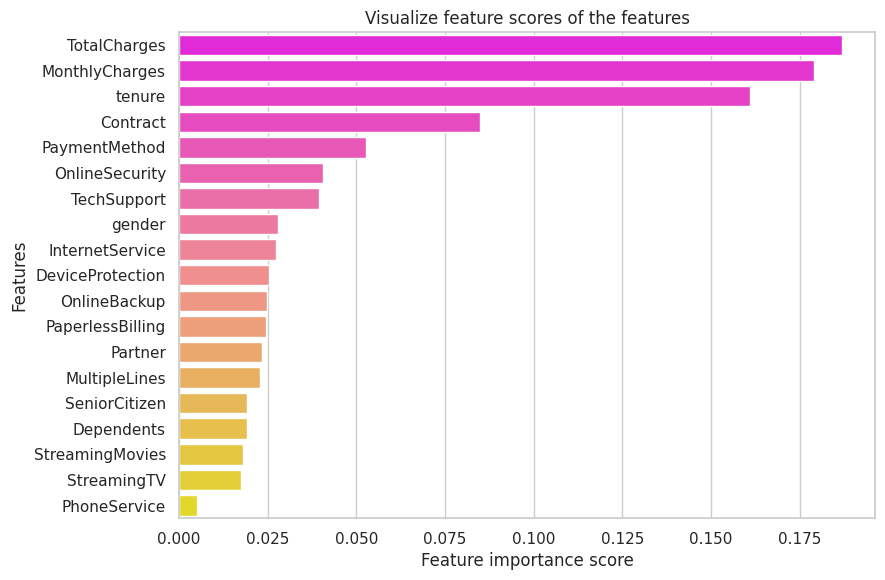

In [28]:
# Creating a seaborn bar plot to visualize feature scores
f, ax = plt.subplots(figsize=(8,6))
ax = sns.barplot(x=feature_scores.values, y=feature_scores.index, palette='spring')
ax.set_title("Visualize feature scores of the features")
ax.set_yticklabels(feature_scores.index)
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
plt.show()

In [ ]:
#We can see that the most important feature is TotalCharges and least important feature is PhoneService.
#Now, I will drop the least important feature from the model, rebuild the model and check its effect on accuracy.

In [29]:
# drop the least important feature from X_train, X_test and test set for further analysis
X1_train = x_train.drop(['PhoneService'], axis=1)
X1_test = x_test.drop(['PhoneService'], axis=1)

In [30]:
accuracy_scores1 = []

# iterate over classifiers and predict accuracy
for name, clf in zip(names, classifiers):
    clf.fit(X1_train, y_train)
    score = clf.score(X1_test, y_test)
    score = round(score, 4)
    accuracy_scores1.append(score)
    print(name ,' : ' , score)

Random Forest  :  0.7935
LightGBM  :  0.8077
XGBoost  :  0.8013
ExtraTreesClassifier  :  0.7793


In [31]:
classifiers_performance1 = pd.DataFrame({"Classifiers": names, "Accuracy Scores": accuracy_scores,
                                         "Accuracy Scores1": accuracy_scores1})
classifiers_performance1

,Classifiers,Accuracy Scores,Accuracy Scores1
0,Random Forest,0.7913,0.7935
1,LightGBM,0.8119,0.8077
2,XGBoost,0.7970,0.8013
3,ExtraTreesClassifier,0.7842,0.7793


In [34]:

# make predictions using extra trees for classification
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier
# define dataset
x, y = make_classification (n_samples=7042, n_features=18, n_redundant=1, random_state=1)
# define the model
model = ExtraTreesClassifier()
# fit the model on the whole dataset
model.fit(x, y)

ExtraTreesClassifier()

In [36]:
# predict on the test set
y1_pred = model.predict(X1_test)

In [ ]:
# print the accuracy
print('Extral Tree Classifier accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y1_pred)))